# Simple MCMC intro 
some instructions below on how to apply mcmc from paper, simple mcmc by ran von ...

![image](images/instructions.jpg)

![image](images/graphs.jpg)

In [82]:
%%capture output
%pip install numpy
%pip install matplotlib
%pip install math

In [83]:
import numpy as np 
import matplotlib.pyplot as plt
import math

In [84]:
# for np.random.normal loc is the mean and sclae is the standard deviation

# looks like this is working fine ...
sum = 0
for i in range (100):
    sum += np.random.normal(loc=100, scale=15)
print(sum/100)

98.90797503076257


In [85]:
# just defining the target distribution:
pi = math.pi
e = math.e
target_mean = 100.0
target_s_d = 15.0

def target_dist_sample(x, m = target_mean,s = target_s_d):
    # m = mean of target, x=proposal / sample val, s = s.d of target
    p = ((s*(2*pi)**0.5)**-1)*e**(-0.5*((x-m)/s)**2)
    return p


might just plot the normal to check my equations are right

Text(0.5, 0, 'x')

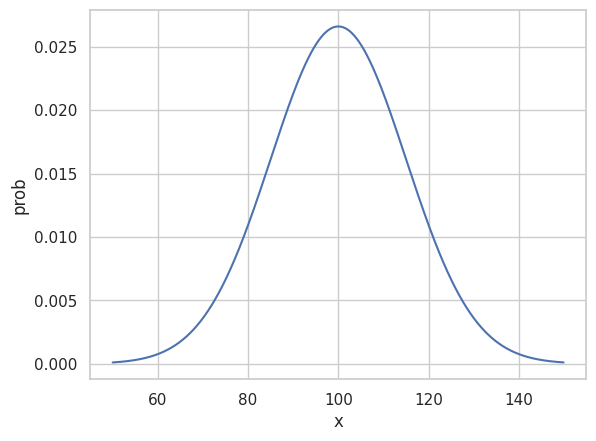

In [86]:
prob_dist = []
X = np.arange(50,150,0.1)
for x in X:
    prob_dist += [target_dist_sample(x=x)]
prob_dist = np.array(prob_dist)
plt.plot(X,prob_dist)
plt.ylabel('prob')
plt.xlabel('x')

looks reasonable ...

In [87]:
p = 0.1
# ok so this will give a 1 at some value p and a zero at prob 1-p

for i in range(10):
    print(np.random.binomial(1,p))

0
0
0
0
0
0
0
0
0
0


(array([ 3.,  0.,  1.,  8., 12., 10., 15., 22., 24., 21., 13., 28., 32.,
        46., 43., 53., 43., 31., 12., 18., 18., 12.,  5., 10.,  5.,  4.,
         0.,  2.,  7.,  3.]),
 array([ 64.45987694,  67.16424833,  69.86861972,  72.5729911 ,
         75.27736249,  77.98173388,  80.68610527,  83.39047666,
         86.09484805,  88.79921943,  91.50359082,  94.20796221,
         96.9123336 ,  99.61670499, 102.32107638, 105.02544777,
        107.72981915, 110.43419054, 113.13856193, 115.84293332,
        118.54730471, 121.2516761 , 123.95604748, 126.66041887,
        129.36479026, 132.06916165, 134.77353304, 137.47790443,
        140.18227582, 142.8866472 , 145.59101859]),
 <BarContainer object of 30 artists>)

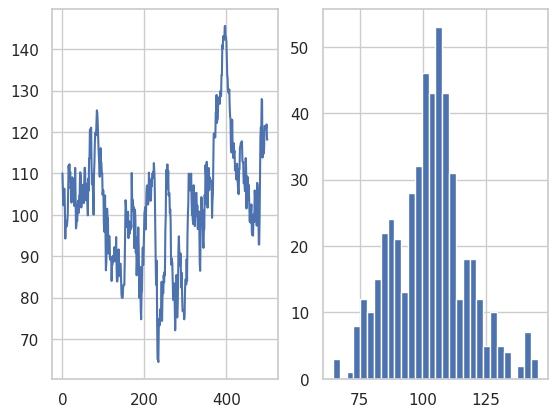

In [88]:
# step one/two
val_estimate = [110]

# steps 3,5,6
for i in range(500):
    noise = np.random.normal(loc=0,scale=5)
    proposal = val_estimate[-1] + noise

    # step three
    # compare the p values from the start_value and proposal using the target distribution
    proposal_p = target_dist_sample(x=proposal)
    val_estimate_p = target_dist_sample(x=val_estimate[-1])
    # accepting the new proposal if it has a higher val
    if proposal_p>val_estimate_p:
        val_estimate += [proposal]
    else:
        p_ratio = proposal_p/val_estimate_p
        accept_anyway = np.random.binomial(1,p=p_ratio)
        # could probably use bitwise maths to avoid the ocnditionals here
        # val_estimate += [proposal*accept_anyway+val_estimate*~(accept_anyway)]
        # this for some reason makes negative numbers though so moving on
        if accept_anyway:
            val_estimate += [proposal*accept_anyway]
        else:
            val_estimate += [val_estimate[-1]]
fig, ax = plt.subplots(1,2)
ax[0].plot(val_estimate)
ax[1].hist(val_estimate, bins=30)



apparently seaborn module will smooth the plot and make it look more like the one in the figures in the paper

In [89]:
%%capture output
%pip install seaborn

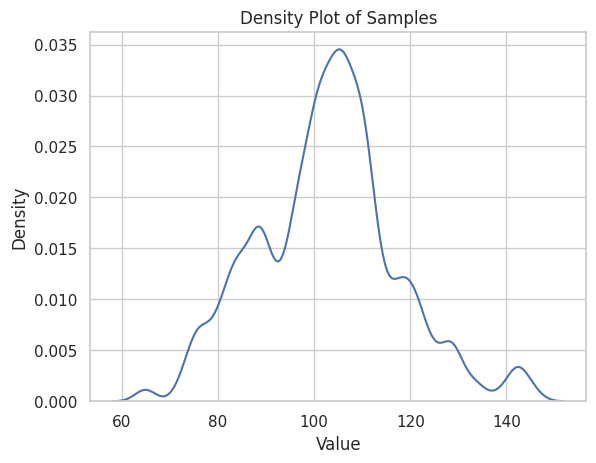

In [90]:
import seaborn as sns
sns.set(style='whitegrid')

sns.kdeplot(val_estimate, bw_adjust=0.5)  # You can adjust the bandwidth with `bw_adjust`

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Plot of Samples')

# Show the plot
plt.show()

probably could have just been done wit matplotlib instead as it also has functions to generate stuff for histograms, looks about right anyway so i guess i should move on to some better forms of mcmc or higher idmension stuff